In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  


In [13]:
numericals_out = pd.read_csv('../data/raw/numerical_no_outlier.csv')

In [14]:
numericals_out.head()

,bedrooms,bathrooms,sqft_above,floors,sqft_lot15,sqft_living15,sqft_basement
0,3,1.00,1180,1.0,5650,1340,0
1,3,2.25,2170,2.0,7639,1690,400
2,2,1.00,770,1.0,8062,2720,0
3,4,3.00,1050,1.0,5000,1360,910
4,3,2.00,1680,1.0,7503,1800,0


In [24]:
num4= numericals_out.copy()

now we have dropped outliers, we will try to correct skewness

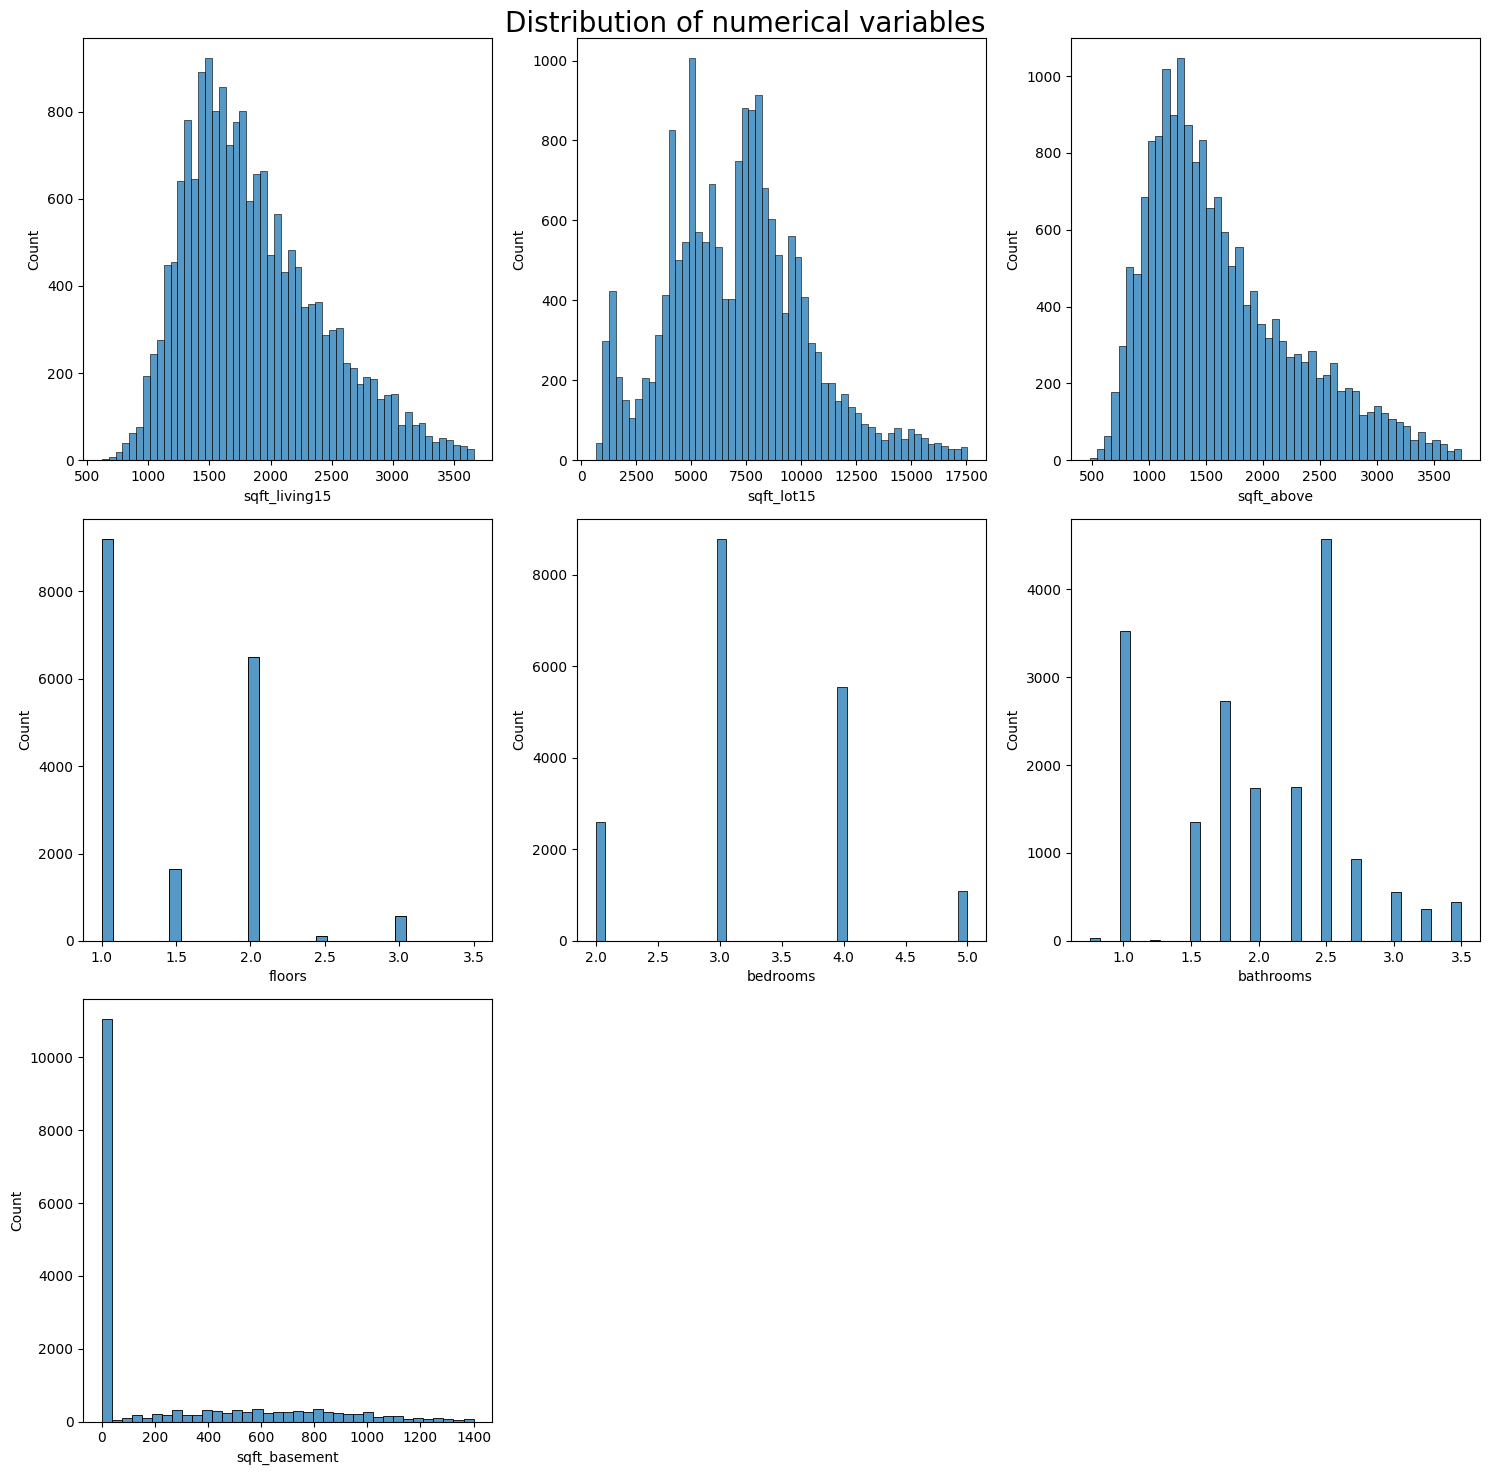

In [16]:
# Specify the list of numerical columns you want to plot
columns_to_plot = ["sqft_living15", "sqft_lot15", "sqft_above", "floors", "bedrooms", "bathrooms", "sqft_basement"]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribution of numerical variables', fontsize=20)

# Iterate through the columns and plot each one
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    sns.histplot(data=numericals_out, x=column, ax=axes[row, col])

# clear the extra subplots
for i in range(len(columns_to_plot), 3 * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [17]:
numericals_out.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,18015.0,3.284985,0.783167,2.00,3.0,3.0,4.0,5.0
bathrooms,18015.0,2.010339,0.666273,0.75,1.5,2.0,2.5,3.5
sqft_above,18015.0,1639.576242,645.463087,480.00,1150.0,1470.0,2000.0,3740.0
floors,18015.0,1.478768,0.543803,1.00,1.0,1.0,2.0,3.5
sqft_lot15,18015.0,7116.569081,3150.361365,651.00,4960.5,7200.0,8964.0,17550.0
sqft_living15,18015.0,1859.038912,555.092810,620.00,1450.0,1760.0,2190.0,3660.0
sqft_basement,18015.0,254.440300,374.060863,0.00,0.0,0.0,500.0,1400.0


In [18]:
#return a table of skewness of each column
numericals_out.skew(axis = 0, skipna = True)

bedrooms         0.212749
bathrooms       -0.050745
sqft_above       0.915936
floors           0.717524
sqft_lot15       0.432660
sqft_living15    0.731283
sqft_basement    1.197521
dtype: float64

In [19]:
#list of columns to correct skewness
columns_to_correct = ["sqft_living15", "sqft_lot15", "sqft_above", "floors", "bathrooms", "sqft_basement"]

we will use power transformer called yeoh-johnson to  address skewness

In [20]:
import sklearn

In [25]:
num4.head()

,bedrooms,bathrooms,sqft_above,floors,sqft_lot15,sqft_living15,sqft_basement
0,3,1.00,1180,1.0,5650,1340,0
1,3,2.25,2170,2.0,7639,1690,400
2,2,1.00,770,1.0,8062,2720,0
3,4,3.00,1050,1.0,5000,1360,910
4,3,2.00,1680,1.0,7503,1800,0


In [26]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False) 
# instantiate the transformer
num4[columns_to_correct] = pt.fit_transform(num4[columns_to_correct])

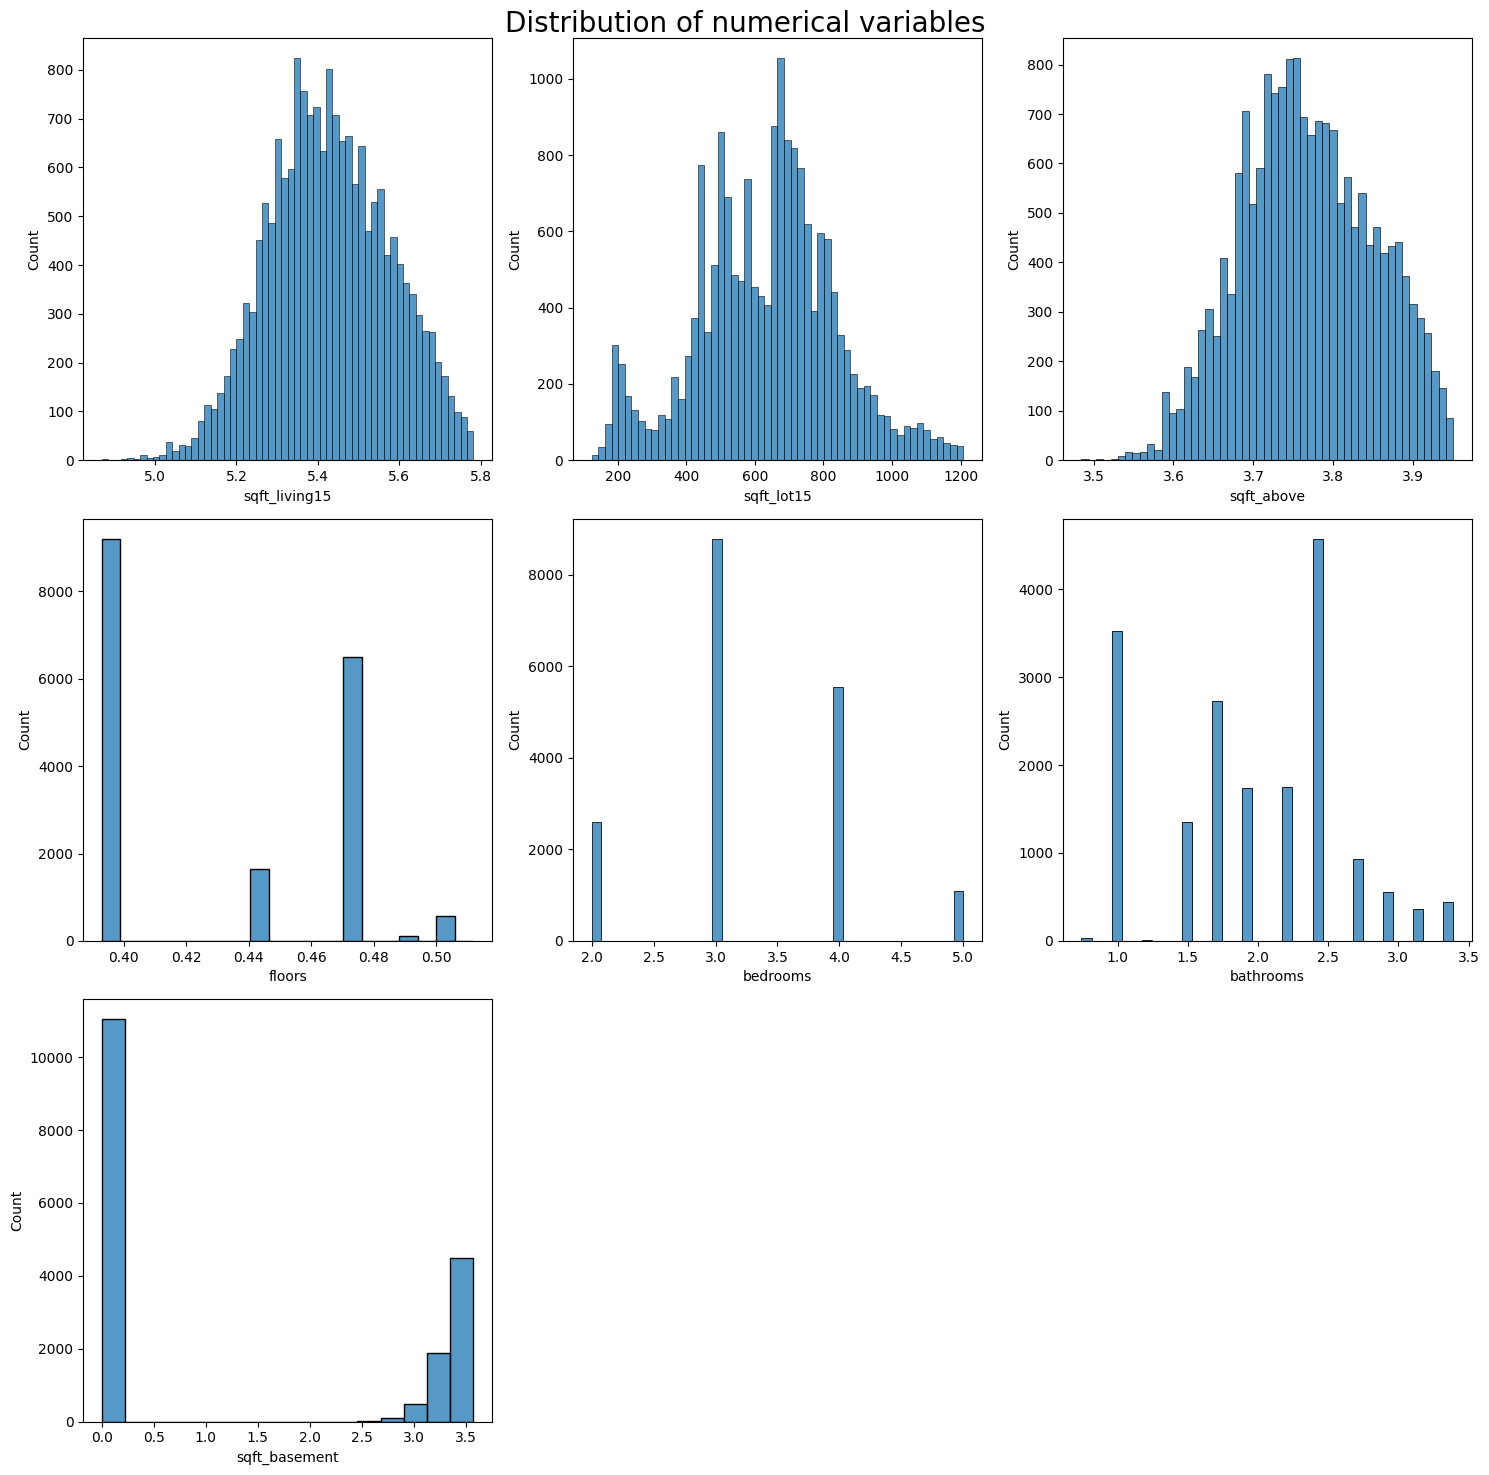

In [27]:
#show distribution after correction
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribution of numerical variables', fontsize=20)

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    sns.histplot(data=num4, x=column, ax=axes[row, col])

# clear the extra subplots
for i in range(len(columns_to_plot), 3 * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

it worked sqt_livin15,sqt_lot15 and sqt_above. but not so much on the rest
so we will only use it on the first 3